# Analyzing Used Car Listings on eBay
   - In this project, we'll work with a dataset of used cars from German eBay website.

The data dictionary is as follows:

- dateCrawled - When this ad was first crawled.
- name - Name of the car.
- seller - Whether the seller is private or a dealer.
- offerType - The type of listing
- price - The price on the ad to sell the car.
- abtest - Whether the listing is included in an A/B test.
- vehicleType - The vehicle Type.
- yearOfRegistration - The year in which the car was first registered.
- gearbox - The transmission type.
- powerPS - The power of the car in PS.
- model - The car model name.
- kilometer - How many kilometers the car has driven.
- monthOfRegistration - The month in which the car was first registered.
- fuelType - What type of fuel the car uses.
- brand - The brand of the car.
- notRepairedDamage - If the car has a damage which is not yet repaired.
- dateCreated - The date on which the eBay listing was created.
- nrOfPictures - The number of pictures in the ad.
- postalCode - The postal code for the location of the vehicle.
- lastSeenOnline - When the crawler saw this ad last online.

## The aim of this project is to analyze the used car listings

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
autos = pd.read_csv("autos.csv", encoding = "Latin-1")

In [3]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

In [4]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [5]:
autos.describe(include = "all")

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-14 20:50:02,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


## Delete 3 columns
   - Seller and offerType columns have only two unique values and nrOfPictures column have no data so delete these columns and clean our data.

In [6]:
autos.drop(["seller", "offerType", "nrOfPictures"], axis= 1, inplace = True)

In [7]:
autos.shape

(50000, 17)

## Change datatypes of a columns
   - Price and odometer columns have a string datatype. So, we should convert them in float before we do any calculations.

In [8]:
autos["dateCrawled"] = pd.to_datetime(autos["dateCrawled"])

In [9]:
autos["dateCrawled"].max()

Timestamp('2016-04-07 14:36:56')

In [10]:
autos["price"]= autos["price"].str.replace(r"[\$\,]", "").astype(float)

In [11]:
autos["odometer"]= autos["odometer"].str.replace(r"[,km]", "").astype(float)

## Remove incorrect data

In [12]:
autos.describe()

,price,yearOfRegistration,powerPS,odometer,monthOfRegistration,postalCode
count,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,9.840044e+03,2005.073280,116.355920,125732.700000,5.723360,50813.627300
std,4.811044e+05,105.712813,209.216627,40042.211706,3.711984,25779.747957
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.100000e+03,1999.000000,70.000000,125000.000000,3.000000,30451.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49577.000000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,71540.000000
max,1.000000e+08,9999.000000,17700.000000,150000.000000,12.000000,99998.000000


From above, we can see that in yearOfRegistration column the min value of year of registratiion is 1000 which is incorrect because the first car was invented in 1883 and max value is 9999 which is techically incorrect. So, we can filter out the data and remove incorrect data.
We will use those data whose yearOfRegistration would be between 1900 to 2016 because it's a 2016 dataset.

In [13]:
autos["yearOfRegistration"].between(1900,2016).sum()

48028

In [14]:
clean_autos = autos[autos["yearOfRegistration"].between(1900,2016)].copy()

In [15]:
clean_autos["yearOfRegistration"].max()

2016

In [16]:
clean_autos["yearOfRegistration"].min()

1910

In [17]:
clean_autos.shape

(48028, 17)

In [18]:
clean_autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48028 entries, 0 to 49999
Data columns (total 17 columns):
dateCrawled            48028 non-null datetime64[ns]
name                   48028 non-null object
price                  48028 non-null float64
abtest                 48028 non-null object
vehicleType            44903 non-null object
yearOfRegistration     48028 non-null int64
gearbox                45604 non-null object
powerPS                48028 non-null int64
model                  45560 non-null object
odometer               48028 non-null float64
monthOfRegistration    48028 non-null int64
fuelType               44301 non-null object
brand                  48028 non-null object
notRepairedDamage      39040 non-null object
dateCreated            48028 non-null object
postalCode             48028 non-null int64
lastSeen               48028 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(10)
memory usage: 6.6+ MB


In [19]:
clean_autos.describe()

,price,yearOfRegistration,powerPS,odometer,monthOfRegistration,postalCode
count,4.802800e+04,48028.00000,48028.000000,48028.000000,48028.000000,48028.000000
mean,9.585252e+03,2002.80351,117.070417,125544.161739,5.767760,50935.867327
std,4.843817e+05,7.31085,195.151278,40106.751417,3.696802,25792.079828
min,0.000000e+00,1910.00000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.00000,71.000000,100000.000000,3.000000,30459.000000
50%,2.990000e+03,2003.00000,107.000000,150000.000000,6.000000,49696.000000
75%,7.400000e+03,2008.00000,150.000000,150000.000000,9.000000,71665.000000
max,1.000000e+08,2016.00000,17700.000000,150000.000000,12.000000,99998.000000


From above, we can see that the min value in price column is 0 which is incorrect because biding always starts from 1 and the max price is 10M dollar which is too much because these cars are second hand or used cars not a brand new cars. So, remove the incorrect data of price column. 

In [20]:
clean_autos["price"].min()

0.0

In [21]:
clean_autos["price"].max()

99999999.0

In [22]:
clean_autos["price"].value_counts().sort_index()

0.0           1335
1.0            150
2.0              2
3.0              1
5.0              2
              ... 
10000000.0       1
11111111.0       2
12345678.0       1
27322222.0       1
99999999.0       1
Name: price, Length: 2334, dtype: int64

In [23]:
cleaned_autos = clean_autos[clean_autos["price"].between(1, 350000)].copy()

In [24]:
cleaned_autos.shape

(46681, 17)

In [25]:
cleaned_autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46681 entries, 0 to 49999
Data columns (total 17 columns):
dateCrawled            46681 non-null datetime64[ns]
name                   46681 non-null object
price                  46681 non-null float64
abtest                 46681 non-null object
vehicleType            43977 non-null object
yearOfRegistration     46681 non-null int64
gearbox                44571 non-null object
powerPS                46681 non-null int64
model                  44488 non-null object
odometer               46681 non-null float64
monthOfRegistration    46681 non-null int64
fuelType               43363 non-null object
brand                  46681 non-null object
notRepairedDamage      38374 non-null object
dateCreated            46681 non-null object
postalCode             46681 non-null int64
lastSeen               46681 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(10)
memory usage: 6.4+ MB


### Most Popular Brands

In [62]:
normalize_brands = cleaned_autos["brand"].value_counts(normalize = True)*100

In [63]:
normalize_brands

volkswagen        21.126368
bmw               11.004477
opel              10.758124
mercedes_benz      9.646323
audi               8.656627
ford               6.989996
renault            4.714980
peugeot            2.984083
fiat               2.564212
seat               1.827296
skoda              1.640925
nissan             1.527388
mazda              1.518819
smart              1.415994
citroen            1.400998
toyota             1.270324
hyundai            1.002549
sonstige_autos     0.981127
volvo              0.914719
mini               0.876159
mitsubishi         0.822604
honda              0.784045
kia                0.706926
alfa_romeo         0.664082
porsche            0.612669
suzuki             0.593389
chevrolet          0.569825
chrysler           0.351321
dacia              0.263490
daihatsu           0.250637
jeep               0.227073
subaru             0.214220
land_rover         0.209936
saab               0.164949
jaguar             0.156381
daewoo             0

The percentage of volkswagen is 21% of all the data. That means volkswagen is the most popular brand and it sold the most.

In [65]:
len(normalize_brands)

40

We only work on those brands which are more than 5% of data in it.

In [66]:
common_brand = normalize_brands[normalize_brands > 5]
common_brand

volkswagen       21.126368
bmw              11.004477
opel             10.758124
mercedes_benz     9.646323
audi              8.656627
ford              6.989996
Name: brand, dtype: float64

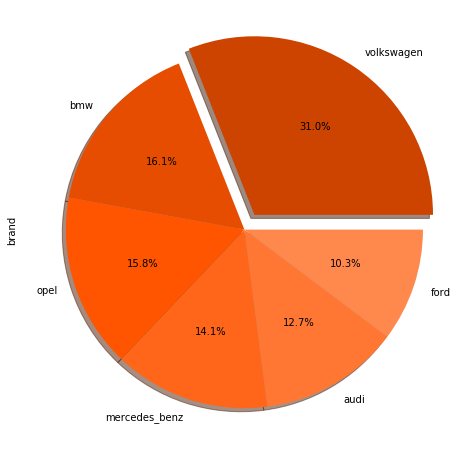

In [102]:
mycolors = ["#cc4400","#e64d00","#ff5500","#ff661a","#ff7733","#ff884d"]
ax = common_brand.plot.pie(figsize = (8,10), autopct = "%.1f%%", shadow = True, explode = [0.1,0,0,0,0,0], 
    colors = mycolors)

plt.show()

In [31]:
brand_bol = cleaned_autos["brand"].isin(common_brand.index)

In [32]:
popular_brands = cleaned_autos[brand_bol].copy()

In [33]:
popular_brands["brand"].value_counts()

volkswagen       9862
bmw              5137
opel             5022
mercedes_benz    4503
audi             4041
ford             3263
Name: brand, dtype: int64

In [34]:
popular_brands.shape

(31828, 17)

In [35]:
popular_brands.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31828 entries, 1 to 49999
Data columns (total 17 columns):
dateCrawled            31828 non-null datetime64[ns]
name                   31828 non-null object
price                  31828 non-null float64
abtest                 31828 non-null object
vehicleType            30015 non-null object
yearOfRegistration     31828 non-null int64
gearbox                30494 non-null object
powerPS                31828 non-null int64
model                  30679 non-null object
odometer               31828 non-null float64
monthOfRegistration    31828 non-null int64
fuelType               29629 non-null object
brand                  31828 non-null object
notRepairedDamage      26053 non-null object
dateCreated            31828 non-null object
postalCode             31828 non-null int64
lastSeen               31828 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(10)
memory usage: 4.4+ MB


### Why volkswagen sold the most

In [36]:
popular_brands.head()

,dateCrawled,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500.0,control,limousine,1997,automatik,286,7er,150000.0,6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990.0,test,limousine,2009,manuell,102,golf,70000.0,7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350.0,test,kombi,2003,manuell,0,focus,150000.0,7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,300.0,test,limousine,1995,manuell,90,golf,150000.0,8,benzin,volkswagen,NaN,2016-03-20 00:00:00,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,1990.0,control,limousine,1998,manuell,90,golf,150000.0,12,diesel,volkswagen,nein,2016-03-16 00:00:00,53474,2016-04-07 03:17:32


In [37]:
brand_mean_price = popular_brands.groupby("brand")["price"].mean().sort_values(ascending = False)
brand_mean_price

brand
audi             9336.687454
mercedes_benz    8628.450366
bmw              8332.820518
volkswagen       5402.410262
ford             3749.469507
opel             2975.241935
Name: price, dtype: float64

In [38]:
brand_mean_mileage = popular_brands.groupby("brand")["odometer"].mean().sort_values(ascending = False)
brand_mean_mileage

brand
bmw              132572.513140
mercedes_benz    130788.363313
opel             129310.035842
audi             129157.386785
volkswagen       128707.158791
ford             124266.012872
Name: odometer, dtype: float64

In [39]:
price_mil = pd.DataFrame(data = brand_mean_price)

In [40]:
price_mil.columns = ["mean_price"]

In [41]:
price_mil.index.name = None

In [42]:
price_mil["mean_mileage"] = brand_mean_mileage

In [43]:
price_mil

,mean_price,mean_mileage
audi,9336.687454,129157.386785
mercedes_benz,8628.450366,130788.363313
bmw,8332.820518,132572.513140
volkswagen,5402.410262,128707.158791
ford,3749.469507,124266.012872
opel,2975.241935,129310.035842


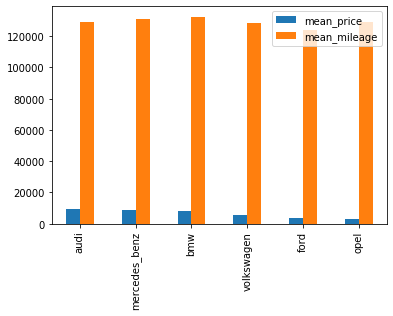

In [44]:
price_mil.plot.bar()
plt.show()

In [45]:
normalize = price_mil.copy()

In [46]:
cols = price_mil.columns
cols

Index(['mean_price', 'mean_mileage'], dtype='object')

In [47]:
for i in cols:
    normalize[i] = normalize[i]/normalize[i].sum()

In [48]:
normalize

,mean_price,mean_mileage
audi,0.242984,0.166697
mercedes_benz,0.224553,0.168802
bmw,0.216859,0.171105
volkswagen,0.140596,0.166116
ford,0.097579,0.160384
opel,0.077430,0.166894


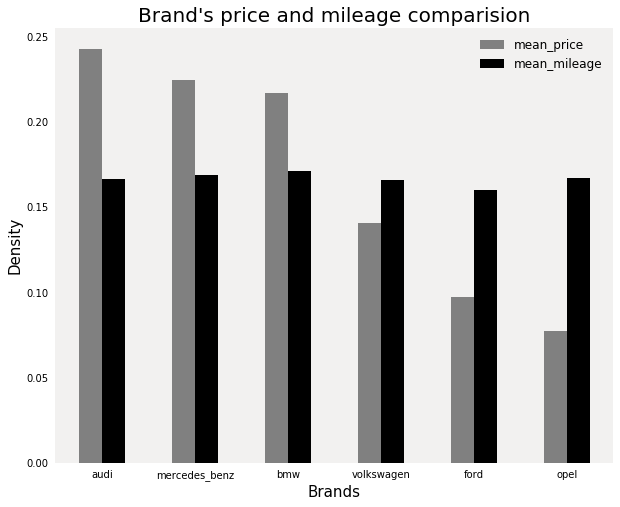

In [69]:
ax = normalize.plot.bar(figsize = (10,8), color = ["grey", "k"], rot = 0)
ax.set_facecolor(color = "#F2F1F0")
ax.set_title("Brand's price and mileage comparision", fontsize = 20)
ax.set_xlabel("Brands", fontsize = 15)
ax.set_ylabel("Density", fontsize = 15)
ax.tick_params(bottom = False, left = False)
ax.legend(frameon = False, fontsize = 12, loc = 'upper right')
for value in ax.spines.values():
    value.set_visible(False)


plt.show()

We can see that average milage of a cars are almost same but the price of volkswagen are comparative less than audi, mercedes and bmw. Thats why volkswagen is a most popular car because it gives good milage with reasonable price.

### Most Popular model in Brands

In [50]:
brand_model = popular_brands.groupby("brand")["model"].value_counts()
brand_model

brand       model  
audi        a4         1231
            a3          825
            a6          797
            andere      216
            80          198
                       ... 
volkswagen  up           51
            jetta        38
            phaeton      31
            cc           18
            amarok        6
Name: model, Length: 96, dtype: int64

In [51]:
c_b = common_brand.index

In [52]:
b_top_m = {}

for i in c_b:
    model = brand_model[i].index[0]
    b_top_m[i] = model
    

In [53]:
b_top_m

{'volkswagen': 'golf',
 'bmw': '3er',
 'opel': 'corsa',
 'mercedes_benz': 'c_klasse',
 'audi': 'a4',
 'ford': 'focus'}

In [54]:
brands = pd.DataFrame(list(b_top_m.items()), columns = ["Brands", "Brands_Model"] )
brands

,Brands,Brands_Model
0,volkswagen,golf
1,bmw,3er
2,opel,corsa
3,mercedes_benz,c_klasse
4,audi,a4
5,ford,focus
